##  Box plot 이상탐지(통계적 기법)
___
* 정의
```
# 많은 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인(EDA 때도 활용됨)
# Box plot은 최소 정상값(min), 1사분위수(Q1), 중앙값(Q2), 3사분위수(Q3), 최대 정상값(max)를 나타내는 시각화 방법
```
<img src = "https://drive.google.com/uc?id=1pQT3D1JhZXEL5Cc79fZJAd5F3LORGezM">

* 장단점
```
  # [good] 데이터를 눈으로 확인하기 어려울 때, 그림을 이용해 데이터의 범위를 빠르게 파악
  # [good] 통계적으로 이상치(Outlier)가 있는지 확인 가능
  # [good] 다양한 정보를 손쉽게 표현할 수 있음
  # [bad] 위치정보에 기반하고 있기 때문에 분포를 확인하기는 어려움
  # [bad] 가운데 선은 평균이 아니다. 오해 소지가 있음 (중앙값임!)
```
  
* 사용방법
```
# 주어진 데이터에서 각 사분위수를 계산한다.
# 그래프에서 제 1사분위수와 제 3사분위수를 기준으로 박스를 그린다.
# 제 2사분위수에 해당하는 위치에 선을 긎는다.
# 제 3사분위수에서 1.5*IQR을 더한 위치에 가로 선을 긋고 제 3사분위수부터 가로선까지 세로선을 긋는다.
# 제 1사분위수에서 1.5*IQR을 뺀 위치에 가로 선을 긋고 제 1사분위수부터 가로선까지 세로선을 긋는다.
# 4,5번에 그은 직선을 넘어서는 위치에 존재하는 값은 동그라미와 같은 기호로 표시한다.(이상치 의미) 
```

* 용어
```
# median - 중앙값
# IQR : 25% ~ 75%에 해당한 부분 
# 75th Percentile : 제 3사분위수
# 25th Percentile : 제 1사분위수
# Whisker : 최댓값, 최솟값
# Outlier : 이상치 (Q3+1.5 IQR, Q1-1.5 IQR)
```

* 현업사례
```
# EDA 단계에서 많이 사용됨
# 공정 센서 데이터 이상탐지
# 검사 및 측정 데이터 이상탐지 
```
   


### 실습
___

In [1]:
# Box plot 그려보기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['default'])

test = pd.DataFrame([34, 5, 9, 10 ,15, 20, 1])
test

,0
0,34
1,5
2,9
3,10
4,15
5,20
6,1


<AxesSubplot:>

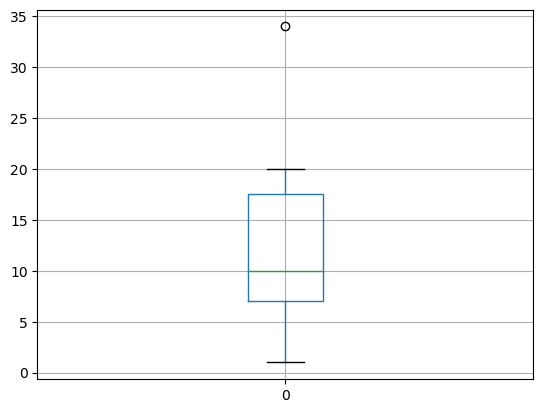

In [2]:
test.boxplot()

In [1]:

import numpy as np
np.random.normal(0,1,10)

array([ 0.13303697,  0.25633111,  0.4824381 ,  0.61171209, -0.73006475,
       -0.47407335,  0.68175538, -1.10855813, -0.07718568,  1.4128389 ])

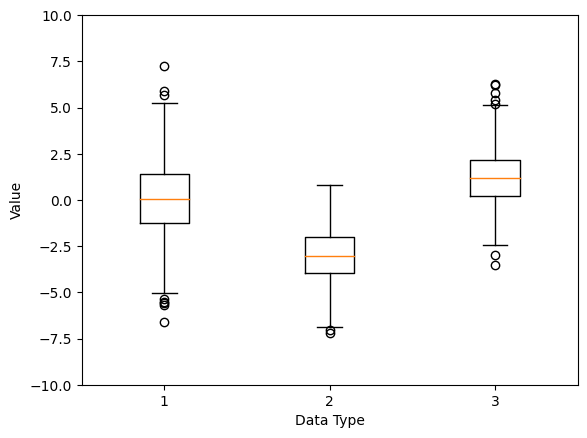

whiskers: [array([-1.25865349, -5.053003  ]), array([1.37786926, 5.24446703]), array([-3.97276636, -6.87369312]), array([-1.98294063,  0.79083774]), array([ 0.19106227, -2.43620231]), array([2.17928809, 5.14158213])]
medians: [array([0.06944406, 0.06944406]), array([-3.02536664, -3.02536664]), array([1.17724746, 1.17724746])]
fliers: [array([-6.59395461, -5.69853409, -5.55705476, -5.35712632, -5.49707034,
        5.70173712,  5.90048949,  7.22365045]), array([-7.21994832, -7.03164603]), array([-2.9696508 , -3.52629527,  5.19588204,  5.8002967 ,  5.40217915,
        6.20473275,  6.28004002])]


In [2]:
# Box plot 그려보기
import numpy as np
import matplotlib.pyplot as plt

data_a = np.random.normal(0, 2.0, 1000) # normal -> 표준편차를 만족하는걸 만들기 (평균, 표준편차, 데이터개수) 
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

labels = ['data_a', 'data_b', 'data_c']

box = plt.boxplot([data_a, data_b, data_c], whis=1.5)  # whis 1.5는 기본값
plt.ylim(-10.0, 10.0)
plt.xlabel('Data Type')
plt.ylabel('Value')
plt.show()

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

In [10]:
import scipy.stats as stats
shapiro_test = stats.shapiro(data_a)
shapiro_test
# pvalue가 0.05 이상이므로 정규분포임.

ShapiroResult(statistic=0.9987789392471313, pvalue=0.7411571741104126)

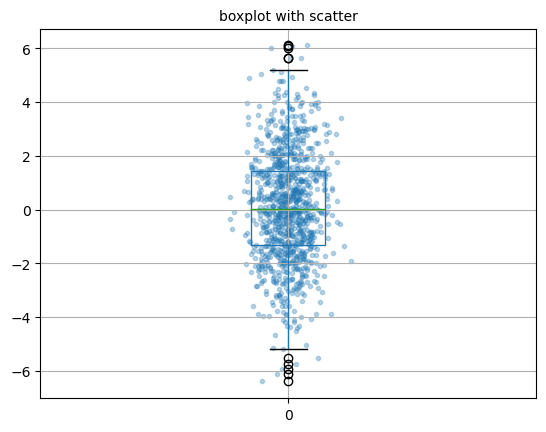

In [29]:
# boxplot의 단점이 분포를 알 수 없는 것이다. -> X 알수있음!! 
df=pd.DataFrame(data_a)
df.boxplot()

# boxplot위에 점을 찍어보자. enumerate() : index과 column_name을 동시에 끄집어 내자.
for i, d in enumerate(df):
    y = df[d]
    x = np.random.normal(i+1, 0.04, len(y)) # np.random.normal(loc, scale, size), loc: 분포의 평균, scale : 표준편차, size : 출력크기
    plt.scatter(x, y, alpha=0.3, marker=".")
    
plt.title("boxplot with scatter", fontsize=10)
plt.show()

In [3]:
box['whiskers'][0].get_ydata()[1]

-5.053003003142203

In [4]:
box['whiskers'][1].get_ydata()[1]

5.244467029319025

In [5]:
box['whiskers']

In [6]:
box['whiskers'][0].get_ydata()

array([-1.25865349, -5.053003  ])

In [7]:
box['whiskers'][1].get_ydata()

array([1.37786926, 5.24446703])

In [8]:
box['boxes'][0].get_ydata()

array([-1.25865349, -1.25865349,  1.37786926,  1.37786926, -1.25865349])

In [9]:
box['fliers'][0].get_ydata()

array([-6.59395461, -5.69853409, -5.55705476, -5.35712632, -5.49707034,
        5.70173712,  5.90048949,  7.22365045])

In [56]:
import pandas as pd
# Outlier 검출하기
def get_box_plot_data(labels, bp):
    rows_list = []
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        dict1['Outlier'] = bp['fliers'][i].get_ydata()
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [14]:
# Box plot summary
get_box_plot_data(labels, box)

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker,Outlier
0,data_a,-5.053003,-1.258653,0.069444,1.377869,5.244467,"[-6.593954607929242, -5.698534092765925, -5.55..."
1,data_b,-6.873693,-3.972766,-3.025367,-1.982941,0.790838,"[-7.219948322948841, -7.0316460308456135]"
2,data_c,-2.436202,0.191062,1.177247,2.179288,5.141582,"[-2.9696507983001936, -3.526295270644927, 5.19..."


In [15]:
# Box plot Outlier 객체 출력
fliers = [item.get_ydata() for item in box['fliers']]
fliers

[array([-6.59395461, -5.69853409, -5.55705476, -5.35712632, -5.49707034,
         5.70173712,  5.90048949,  7.22365045]),
 array([-7.21994832, -7.03164603]),
 array([-2.9696508 , -3.52629527,  5.19588204,  5.8002967 ,  5.40217915,
         6.20473275,  6.28004002])]

In [ ]:
-seaborn 에서 load-datasets() 해서 iris 데이터 가져오기

In [120]:
import seaborn as sns
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


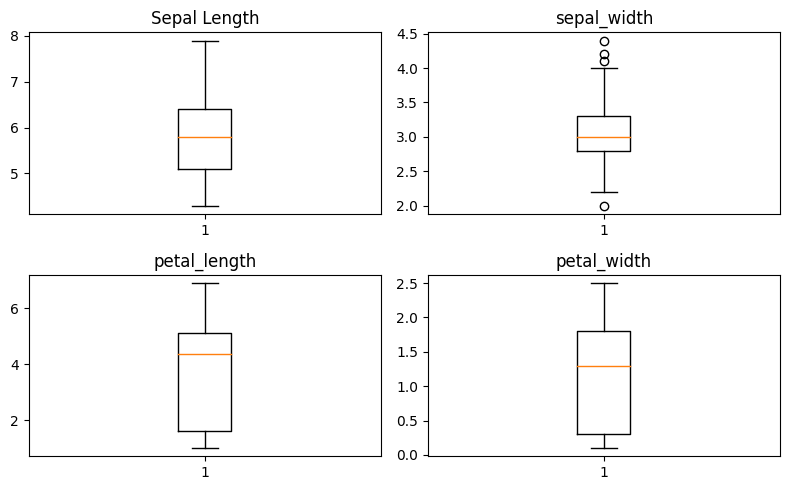

In [121]:
plt.figure(figsize=(8, 5))    
plt.subplot(2, 2, 1)  
box = plt.boxplot(df["sepal_length"])
plt.title("Sepal Length")
plt.subplot(2, 2, 2)  
box1 = plt.boxplot(df["sepal_width"])
plt.title("sepal_width")
plt.subplot(2, 2, 3) 
box2 = plt.boxplot(df["petal_length"])
plt.title("petal_length")
plt.subplot(2, 2, 4) 
box3 = plt.boxplot(df["petal_width"])
plt.title("petal_width")
plt.tight_layout()   
plt.show() 
 

In [122]:
whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']] 
print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

whiskers: [array([5.1, 4.3]), array([6.4, 7.9])]
medians: [array([5.8, 5.8])]
fliers: [array([], dtype=float64)]


In [123]:
label = ["sepal_length"]
label1 = ["sepal_width"]
label2 = ["petal_length"]
label3 = ["petal_width"]

a =get_box_plot_data(label, box)
b =get_box_plot_data(label1, box1)
c =get_box_plot_data(label2, box2)
d = get_box_plot_data(label3, box3)

df_describe = pd.concat([a,b,c,d],axis=0) 
df_describe.set_index("label", inplace=True) 
df_describe

,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker,Outlier
label,,,,,,
sepal_length,4.3,5.1,5.80,6.4,7.9,[]
sepal_width,2.2,2.8,3.00,3.3,4.0,"[2.0, 4.4, 4.1, 4.2]"
petal_length,1.0,1.6,4.35,5.1,6.9,[]
petal_width,0.1,0.3,1.30,1.8,2.5,[]


In [ ]:
EllipticEnvelope ->마할라노비스 

In [125]:
import pandas as pd
import numpy as np

# 정규 분포를 이용하여 데이터 분포에 타원(elliptic)을 그림, 타원에서 벗어날수록 outlier
# 마할라노비스 이상탐지 방법
from sklearn.covariance import EllipticEnvelope
# 랜덤 데이터를 생성하는데 사용됩니다. (※ 모든 방향으로 같은 성질을 가지는 정규분포를 이용해
# 가상 데이터 생성 클러스링 용 가상데이터를 생성하는데 사용하는 데이터세트)
from sklearn.datasets import make_blobs

# 랜덤 데이터 생성, 샘플수도 변경해보세요.
X, y = make_blobs(n_samples = 100,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)


# 이상치 Input
X[0,0] = 10 # feature 0에 0번째 데이터
X[0,1] = -10 # feature 1에 0번째 데이터

In [127]:
# EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성합니다.
# The amount of "contamination" of the data set, i.e. the proportion of outliers in the data set
# 데이터세트에서 outlier의 비율, contamination 하이퍼파라미터도 조절해보세요.
outlier_detector = EllipticEnvelope(contamination=.1)

# EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(X)

# outlier를 검출
# +1 이면 boundary 안에 들어온 값으로 정상 데이터
# -1 이면 outlier로 간주.
pred = outlier_detector.predict(X)
pred

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1])

In [128]:
# ▶ Raw data + Pred data
df = pd.DataFrame(X, columns=['col1', 'col2'])
df['outlier'] = pred
df

,col1,col2,outlier
0,10.000000,-10.000000,-1
1,-0.813399,3.546974,1
2,-3.103674,3.902024,1
3,-1.429465,5.168501,1
4,0.868766,4.157855,-1
...,...,...,...
95,-0.620735,6.593470,-1
96,-1.642150,3.284471,1
97,-1.373973,5.291631,1
98,-0.848608,5.450932,1


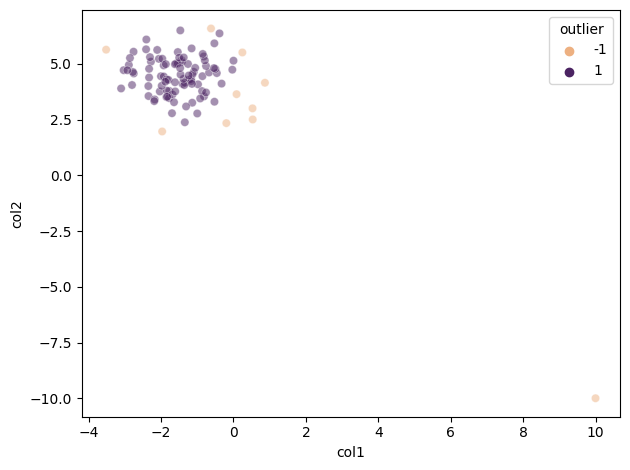

In [140]:
sns.scatterplot(data=df, x=df["col1"] ,y=df["col2"], hue="outlier" , alpha = 0.5 , palette= "flare")
plt.tight_layout()
plt.show()

In [141]:
!pip install pyod

                                              0.0/153.4 kB ? eta -:--:--
     --------------------                    81.9/153.4 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 153.4/153.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/2.6 MB ? eta -:--:--
     ----                                     0.3/2.6 MB 5.2 MB/s eta 0:00:01
     ----------                               0.6/2.6 MB 6.8 MB/s eta 0:00:01
     --------------------                     1.3/2.6 MB 8.4 MB/s eta 0:00:01
     ----------------------------             1.8/2.6 MB 9.0 MB/s eta 0:00:01
     -------------------------------------    2.4/2.6 MB 9.6 MB/s eta 0:00:01
     ---------------------------------------- 2.6/2.6 MB 9.1 MB/s eta 0:00:00
                                              0.0/27.7 MB ? eta -:--:--
                                              0.6/27.7

In [149]:
y_train_scores

array([0.17680922, 0.17681203, 0.54523185, 0.12608553, 0.19581244,
       0.17067156, 0.41453041, 0.38274843, 0.1742502 , 0.21906751,
       0.27800179, 0.3967311 , 0.13563991, 0.2824055 , 0.35361755,
       0.21985449, 0.41959195, 0.20121522, 0.34246038, 0.40595618,
       0.15849834, 0.15316691, 0.18575777, 1.20721193, 0.3246424 ,
       0.67725112, 0.37490181, 0.26533808, 0.16490669, 0.12894673,
       0.36927073, 0.27533184, 1.09262182, 0.12874088, 0.52628977,
       0.47316168, 0.19889931, 0.54173847, 0.25788258, 0.51121412,
       0.69650399, 0.25395638, 0.39337622, 0.30925068, 0.13278071,
       0.26313772, 0.36581778, 0.16432511, 0.86640384, 0.22059379,
       0.19717364, 0.19429925, 0.49426445, 0.29011618, 0.12090561,
       0.2326855 , 0.41988645, 0.44953767, 0.3652311 , 0.18579117,
       0.58210708, 0.26240824, 0.33695247, 0.26077608, 0.651675  ,
       0.31036962, 0.73120652, 0.37810831, 0.54019913, 0.39861805,
       0.19088253, 0.3530383 , 0.16268355, 0.71043871, 0.20893

In [150]:
visualize(clf_name, X_train, y_train, X_test, y_test,y_train_pred, save_figure=True)

NameError: name 'y_test_pred' is not defined

<Figure size 300x300 with 0 Axes>

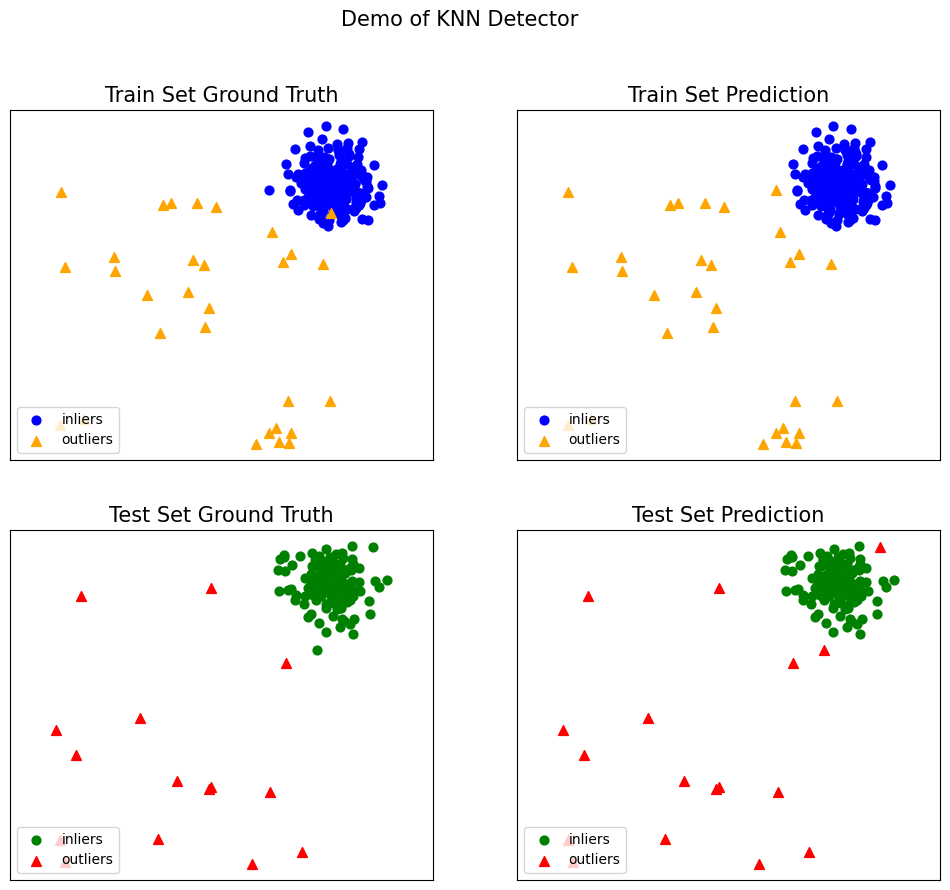

In [11]:
from pyod.utils.example import visualize  # 시각화
from pyod.utils.data import evaluate_print  # 평가용
from pyod.utils.data import generate_data # 연습용 데이터 생성
from pyod.models.knn import KNN
import matplotlib.pyplot as plt


#하이퍼 파라미터
contamination = 0.1  # ▶ percentage of outliers
n_train = 300        # ▶ number of training points
n_test = 150         # ▶ number of testing points

#▶ Generate sample data
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)


#▶ 모델 생성 및 학습
clf_name = 'KNN' # 나중에 평가용 함수에서 출력용으로 사용
clf = KNN(n_neighbors=7)
clf.fit(X_train)


#▶ Train set score
#위에서 fitting(훈련)했으니
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_


#▶ Test set score
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)


#▶ visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)

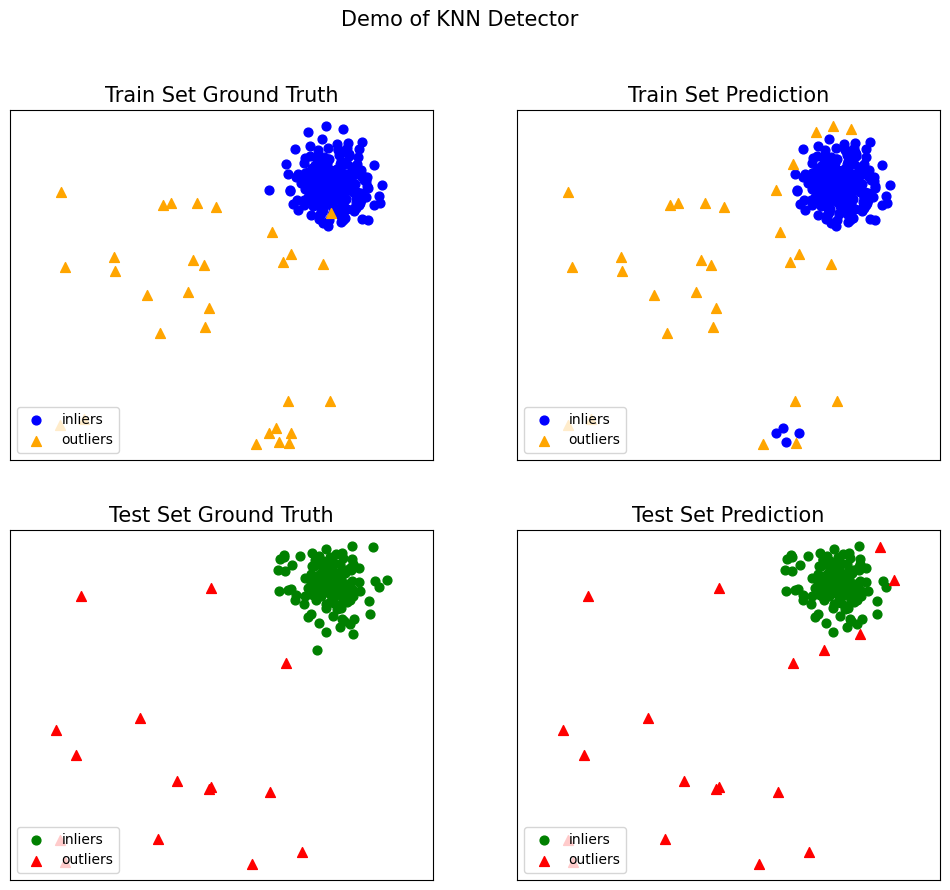

In [12]:
from pyod.utils.example import visualize  # 시각화
from pyod.utils.data import evaluate_print  # 평가용
from pyod.utils.data import generate_data # 연습용 데이터 생성
from pyod.models.knn import KNN
import matplotlib.pyplot as plt


#하이퍼 파라미터
contamination = 0.1  # ▶ percentage of outliers
n_train = 300        # ▶ number of training points
n_test = 150         # ▶ number of testing points

#▶ Generate sample data
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)


#▶ 모델 생성 및 학습
clf_name = 'KNN' # 나중에 평가용 함수에서 출력용으로 사용
clf = KNN(n_neighbors=3)
clf.fit(X_train)


#▶ Train set score
#위에서 fitting(훈련)했으니
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_


#▶ Test set score
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)


#▶ visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)